Is it Demo? (Y or N) n
Filename:cho.txt
Enter number of clusters:5
(386, 16)
(5, 16) (5, 16, 16) (5, 1)
Stopping criteria: Iterations
 Iterations:100
 Tolerance:-1.800949270602814e-06
Mean of the data: 
[array([-0.64488513, -0.63349744, -0.76197587, -0.50453889, -0.16282096,
        0.16323892,  0.542968  ,  0.69909448,  0.59988449, -0.07184775,
       -0.26634684, -0.1043688 ,  0.06168042,  0.28228247,  0.43867562,
        0.35281632]), array([ 0.09940429, -0.37062587, -0.90499272, -0.81207595, -0.60405438,
       -0.43849787, -0.39501752, -0.15068456,  0.38231406,  0.80202382,
        0.47086723,  0.17937542,  0.0135639 ,  0.08299109,  0.21601414,
        0.54134377]), array([-0.36998995, -0.15844972,  0.36458079,  0.24757288,  0.08541927,
        0.00342713, -0.1605234 , -0.30093306, -0.2406973 ,  0.32510878,
        0.29770275,  0.17646866,  0.035295  , -0.10521056, -0.19654967,
       -0.16429503]), array([-1.31020713, -2.09812157, -1.9147348 , -1.18464807, -0.66841772,
        0.

<IPython.core.display.Javascript object>


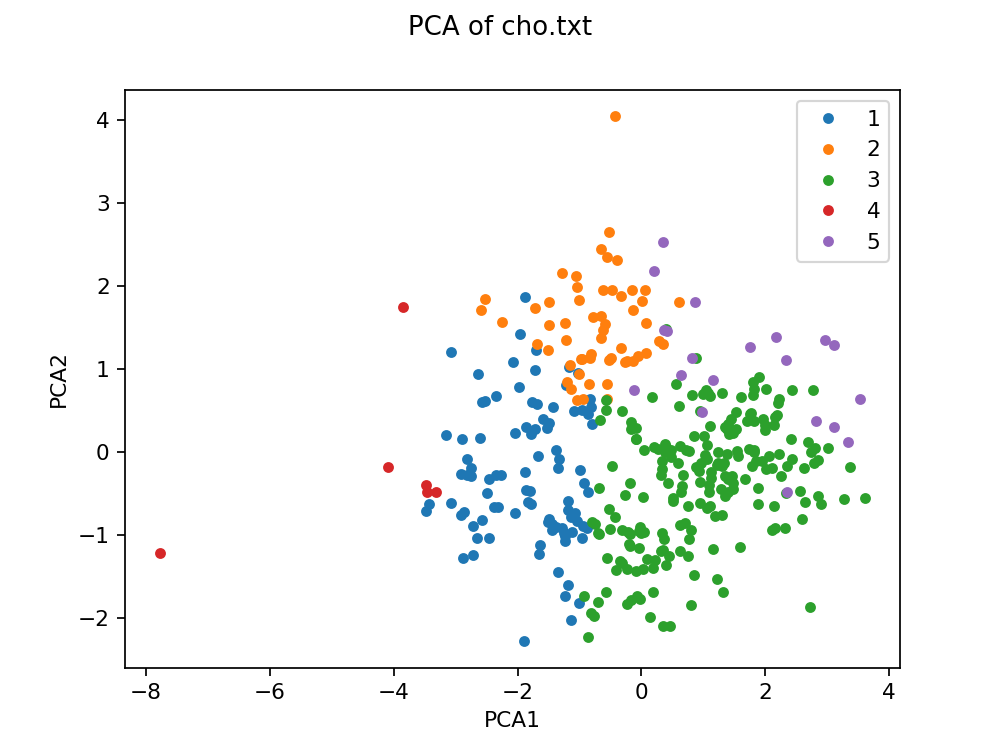

jaccard:  0.3268443820881562
rand:  0.6908641842734033


In [2]:
%matplotlib notebook
import random
import math 
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA

def random_centroids():
    random_k_indices= random.sample(range(1, len(features)), k)
    for i in range(len(random_k_indices)):
        centroids.append(features[random_k_indices[i]])

def cluster_Assignment(feature):
    min_dist=sys.maxsize
    closest_centriod=0
    for i in range(len(mea)):
        dist=0
        for feature_index in range(len(feature)):
            dist+=(feature[feature_index]-mea[i][feature_index])**2
        dist=math.sqrt(dist)
        if min_dist > dist:
            min_dist=dist
            closest_centriod=i
    return closest_centriod

def removeOutliers(features, gTruthCluster):
    for i in range(len(gTruthCluster)):
        if gTruthCluster[i] == -1:
            features = np.delete(features, (i), axis = 0)            
    return features

def multivariateGaussian(trainData, means, covariance):
    invCovariance = np.linalg.inv(covariance)
    data = []
    for i in range(trainData.shape[0]):
            sub1 = np.array(trainData[i,:]) - means  
            sub1_T = sub1.transpose()
            sub2 = np.dot(invCovariance, sub1_T) 
            sub3 = -0.5 * (np.dot(sub1, sub2))
            data.append(np.exp(sub3)/(np.sqrt((2*np.pi)*(2*np.pi) * np.linalg.det(covariance))))
    return np.array(data)

class GMM:
    def __init__(self,X,cluster_size,iterations):
        self.iterations = iterations
        self.cluster_size = cluster_size
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
    
    def run(self):
        self.cov_k = smoothingValue*np.identity(self.X.shape[1]).astype('double')
       
        self.mu = np.array(centroids)
        if cent.lower() == 'y':
            self.mu = np.array([[0,0],[1,1]])
        a = np.eye(self.X.shape[1])
        self.cov = np.repeat(a[:,:,np.newaxis],self.cluster_size, axis =2).T*1e+1
        if cent.lower() == 'y':
            self.cov = np.array([[[1,1],[1,1]],[[2,2],[2,2]]]).astype('double')

        self.pi = np.ones((self.cluster_size,1))/self.cluster_size 

        if cent.lower() == 'y':
            self.pi = np.array(piValue)
        log_likelihood = [0] 
        np.fill_diagonal(self.cov_k, 0.2)
        print(self.mu.shape, self.cov.shape, self.pi.shape)

        iteration = 0
        for i in range(self.iterations):               
            "E Step"
            
            r_ik = np.zeros((len(self.X),self.cluster_size))
            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(self.cluster_size)):
                co = co + self.cov_k
                
                base = [pi_k*multivariateGaussian(X, mu_k,co_k) for pi_k,mu_k,co_k in zip(self.pi,self.mu,self.cov+self.cov_k)]
                base = np.sum(base, axis=0)
                
                r_ik[:,r] = p*multivariateGaussian(X, m,co)/base
            
            "M Step"
            
            self.mu = []
            self.cov = []
            self.pi = []
            current = 0
            initial = 0
            
            for i in range(len(r_ik[0])):
                m_k = np.sum(r_ik[:,i],axis=0)
                mu_k = (1/m_k)*np.sum(self.X*r_ik[:,i].reshape(self.X.shape[0],1),axis=0)
                self.mu.append(mu_k)
                self.cov.append(((1/m_k)*np.dot((np.array(r_ik[:,i]).reshape(len(self.X),1)*(self.X-mu_k)).T,(self.X-mu_k)))+self.cov_k)
                self.pi.append(m_k/np.sum(r_ik)) 
            
            iteration += 1
            "Log likelihood"
            initial = log_likelihood[-1]
            current = np.log(np.sum([k*multivariateGaussian(X,self.mu[i],self.cov[j]) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))]))
            log_likelihood.append(current)
            if abs(current - initial) < c_threshold:
                print('Stopping criteria: Convergence\n Iterations:{}\n Tolerance:{}'.format(iteration, abs(current - initial)))
                return self.mu, self.cov, self.pi
                break

        print('Stopping criteria: Iterations\n Iterations:{}\n Tolerance:{}'.format(iteration, current - initial))
        return self.mu, self.cov, self.pi
        
cent = input("Is it Demo? (Y or N) ")

file_name =input("Filename:")
file_name = "cho.txt"

k = int(input("Enter number of clusters:"))

data = np.loadtxt(file_name, delimiter="\t",dtype='str')
data=np.asarray(data)
features = data.astype(np.float)
#features = features[np.logical_not(features[:,1] == -1)]
ground_truth = data[:, 1]
features = removeOutliers(features, ground_truth)
features=np.delete(features, [0,1], 1)
c_threshold = 1e-9
smoothingValue = 1e-9
centroids=[]
random_centroids()
iterationNo = 100

if cent.lower() == 'y':
    piValue = []
    for i in range(k):
        piValue.append(float(input("Enter cluster probability for index"+str(i+1)+"-")))

    muValue = []
    print("Enter mu values:")
    for i in range(k):
        mean = []
        for j in range(features.shape[1]):
            mean.append((float(input(""))))
        muValue.append(mean)

    iterationNo = int(input("Enter number of iterations:"))
    c_threshold =float(input("Enters threshold value:"))
    smoothingValue = float(input("Enters smoothing value:"))

X = np.array(features)
print(X.shape)
gmm = GMM(X,k,iterationNo)    
mea, covar, prob = gmm.run()
print("Mean of the data: ")
print(mea)

print("Covariance of the data: ")
print(covar)

print("Probabilities of the clusters: ")
print(prob)

test_clusters=[]
for i in range(len(features)):
    test_clusters.append(cluster_Assignment(features[i])+1)
    
################# PCA Visualization ################################################
data = np.loadtxt(file_name, delimiter="\t",dtype='str')
features_count = len(data[0])-1

data = np.asmatrix(data)
features = np.delete(data,[0,1],1)
features = features.astype(np.float)
labels = data[:, features_count]

mean_features = np.mean(features, axis=0)
adjusted_data = features - mean_features
covariance_matrix = np.cov(adjusted_data.T)

w, v = LA.eig(covariance_matrix)

w = w.argsort()[::-1][:2]
v = v[:,w]

principal_components = adjusted_data * v
principal_components = np.asarray(principal_components)

labels = test_clusters
df = pd.DataFrame(dict(xAxis=principal_components[:,0], yAxis=principal_components[:,1], label=labels))
diesase_groups = df.groupby('label')
    
fig, ax = plt.subplots()
fig.suptitle('PCA of ' + file_name)
for disease, diesase_group in diesase_groups:
    ax.plot(diesase_group.xAxis, diesase_group.yAxis, marker='o', linestyle='', ms=4, label=disease)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
ax.legend()
plt.savefig('PCA_' + os.path.splitext(os.path.basename(file_name))[0] + ".png", dpi = 400)
plt.show()

################# Analysis ################################################
def get_incidence_matrix(labels):
    incidence_matrix = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            incidence_matrix[i][j] = 1 if labels[i] == labels[j] else 0
    return incidence_matrix

def get_data_count(G, A):
    m11 = m00 = m10 = m01 = 0.0
    for i in range(len(G)):
        for j in range(len(G)):
            if G[i][j] == 1 and A[i][j] == 1:
                m11 += 1
            elif G[i][j] == 0 and A[i][j] == 0:
                m00 += 1
            elif G[i][j] == 0 and A[i][j] == 1:
                m10 += 1
            elif G[i][j] == 1 and A[i][j] == 0:
                m01 += 1
                
    return m11, m00, m10, m01

def jaccard(m11,m10,m01):
    return m11/(m11 + m10 + m01)

def rand(m00,m11,m10,m01):
    return (m00 + m11)/(m00 + m11 + m10 + m01)

ground_truth_matrix = get_incidence_matrix(ground_truth)
actual_cluster_matrix = get_incidence_matrix(test_clusters)
m11,m00,m10,m01 = get_data_count(ground_truth_matrix, actual_cluster_matrix)

print('jaccard: ', jaccard(m11,m10,m01))
print('rand: ', rand(m00,m11,m10,m01))